# **Level3 Task1** Predictive Modeling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from google.colab import files

In [ ]:
## Load the dataset
uploaded = files.upload()

# Assuming the file is named 'Dataset .csv'
file_path = next(iter(uploaded))
data = pd.read_csv(file_path)

Saving Dataset .csv to Dataset  (1).csv


In [ ]:
# Display the first few rows of the dataset to understand its structure
print("Initial Data:")
print(data.head())

Initial Data:
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City

In [ ]:
# Preprocessing
# Remove rows with missing values in the target or feature columns
data.dropna(subset=['Aggregate rating', 'Has Table booking', 'Has Online delivery', 'Price range'], inplace=True)

# Convert categorical features to numerical
data['Has Table booking'] = data['Has Table booking'].map({'Yes': 1, 'No': 0})
data['Has Online delivery'] = data['Has Online delivery'].map({'Yes': 1, 'No': 0})
data['Price range'] = data['Price range'].astype('int')

In [ ]:
# Define features and target variable
X = data[['Has Table booking', 'Has Online delivery', 'Price range']]
y = data['Aggregate rating']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, r2

In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_mae, lr_r2 = evaluate_model(lr_model, X_test, y_test)
print(f"Linear Regression - MAE: {lr_mae}, R2: {lr_r2}")

Linear Regression - MAE: 1.0930614682328548, R2: 0.23459427586630932


In [ ]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_mae, dt_r2 = evaluate_model(dt_model, X_test, y_test)
print(f"Decision Tree Regressor - MAE: {dt_mae}, R2: {dt_r2}")

Decision Tree Regressor - MAE: 1.0566164758636594, R2: 0.2595513514163821


In [ ]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_mae, rf_r2 = evaluate_model(rf_model, X_test, y_test)
print(f"Random Forest Regressor - MAE: {rf_mae}, R2: {rf_r2}")

Random Forest Regressor - MAE: 1.0564673416497496, R2: 0.2594882237255539


In [ ]:
# Compare the performance of the models
print("\nModel Comparison:")
print(f"Linear Regression - MAE: {lr_mae:.2f}, R2: {lr_r2:.2f}")
print(f"Decision Tree Regressor - MAE: {dt_mae:.2f}, R2: {dt_r2:.2f}")
print(f"Random Forest Regressor - MAE: {rf_mae:.2f}, R2: {rf_r2:.2f}")


Model Comparison:
Linear Regression - MAE: 1.09, R2: 0.23
Decision Tree Regressor - MAE: 1.06, R2: 0.26
Random Forest Regressor - MAE: 1.06, R2: 0.26


# **Level3 Task2** Customer Preference Analysis

In [ ]:
# Split multiple cuisines into separate rows
data['Cuisines'] = data['Cuisines'].str.split(', ')
data = data.explode('Cuisines')

In [ ]:
# Analyze the relationship between the type of cuisine and the restaurant's rating
cuisine_rating = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage Rating by Cuisine:")
print(cuisine_rating)


Average Rating by Cuisine:
Cuisines
Sunda             4.900000
B�_rek            4.700000
Taiwanese         4.650000
Ramen             4.500000
Dim Sum           4.466667
                    ...   
Moroccan          1.620000
Awadhi            1.572727
Armenian          1.300000
Mineira           0.000000
Cuisine Varies    0.000000
Name: Aggregate rating, Length: 145, dtype: float64


In [ ]:
# Identify the most popular cuisines based on the number of votes
cuisine_votes = data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
print("\nMost Popular Cuisines by Number of Votes:")
print(cuisine_votes)


Most Popular Cuisines by Number of Votes:
Cuisines
North Indian      595981
Chinese           364351
Italian           329265
Continental       288255
Fast Food         184058
                   ...  
Malay                 25
Canadian               6
Peruvian               5
Cuisine Varies         2
Mineira                2
Name: Votes, Length: 145, dtype: int64


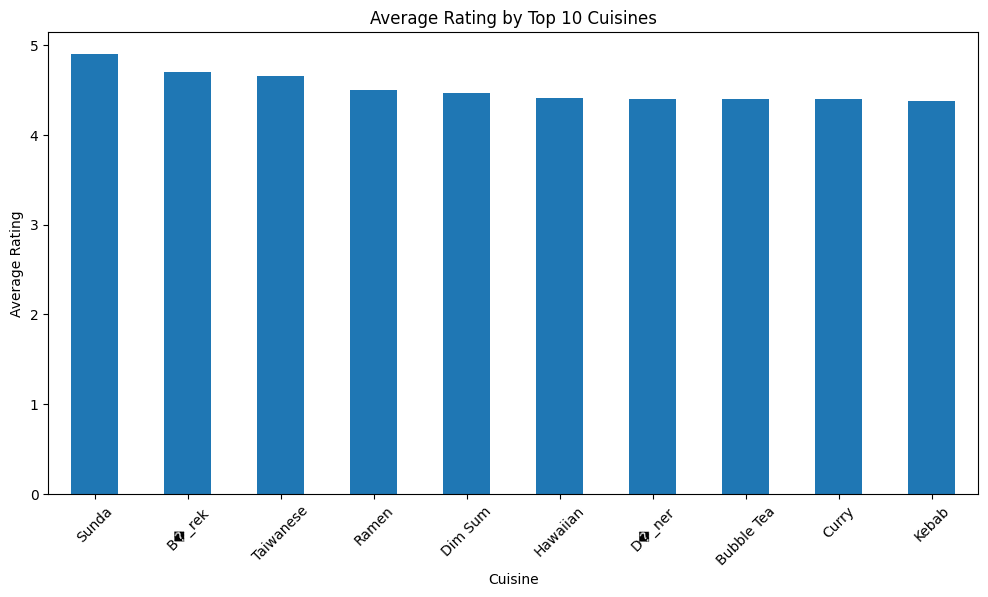

In [ ]:
# Plot average ratings by cuisine for the top 10 cuisines
top_10_cuisine_rating = cuisine_rating.head(10)

plt.figure(figsize=(12, 6))
top_10_cuisine_rating.plot(kind='bar')
plt.title('Average Rating by Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

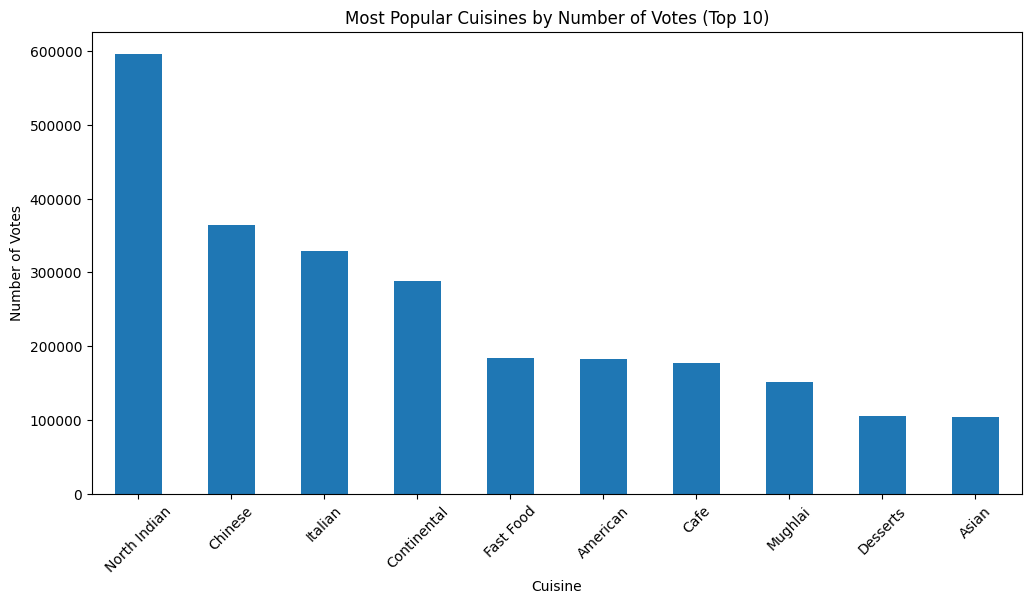

In [ ]:
# Plot number of votes by cuisine for the top 10 cuisines
top_10_cuisine_votes = cuisine_votes.head(10)

plt.figure(figsize=(12, 6))
top_10_cuisine_votes.plot(kind='bar')
plt.title('Most Popular Cuisines by Number of Votes (Top 10)')
plt.xlabel('Cuisine')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Determine if specific cuisines tend to receive higher ratings (top 10 cuisines)
top_cuisines = cuisine_rating.head(10).index
top_cuisine_data = data[data['Cuisines'].isin(top_cuisines)]

# Print the data for the top 10 cuisines
print("\nTop 10 Cuisines by Average Rating:")
print(top_cuisine_data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False))


Top 10 Cuisines by Average Rating:
Cuisines
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
Bubble Tea    4.400000
D�_ner        4.400000
Curry         4.400000
Kebab         4.380000
Name: Aggregate rating, dtype: float64


# **Level3 Task3** Data Visualization

In [ ]:
import seaborn as sns
import pandas as pd


In [ ]:
# Display the first few rows of the dataset
print(data.head())

# Display the columns and data types
print(data.columns)
print(data.info())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
0        6317637        Le Petit Souffle           162       Makati City   
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
0  Third Floor, Century City Mall, Kalayaan Avenu...   
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
0   Century City Mall, Poblacion, Makati City   
0   Century City Mall, Poblacion, Makati City   
1  Little 

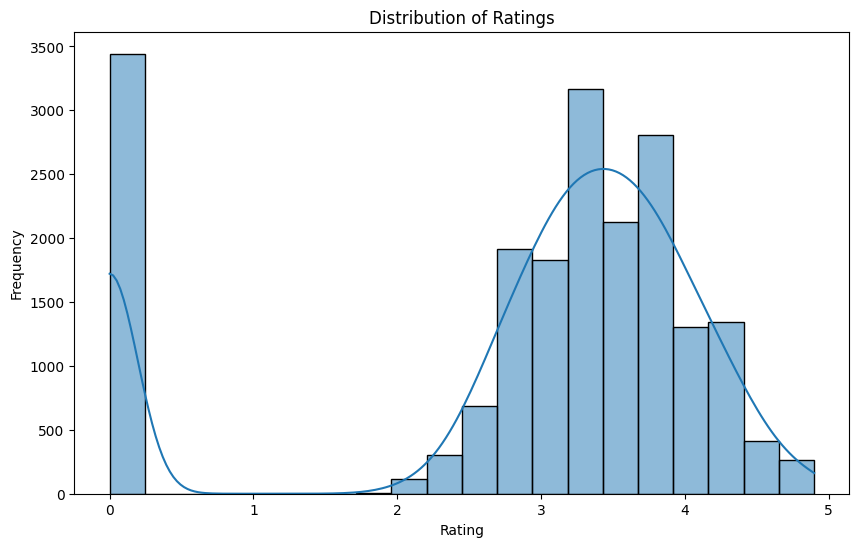

In [ ]:
# Column for ratings
ratings_column = 'Aggregate rating'

# Plot a histogram of the ratings
plt.figure(figsize=(10, 6))
sns.histplot(data[ratings_column], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

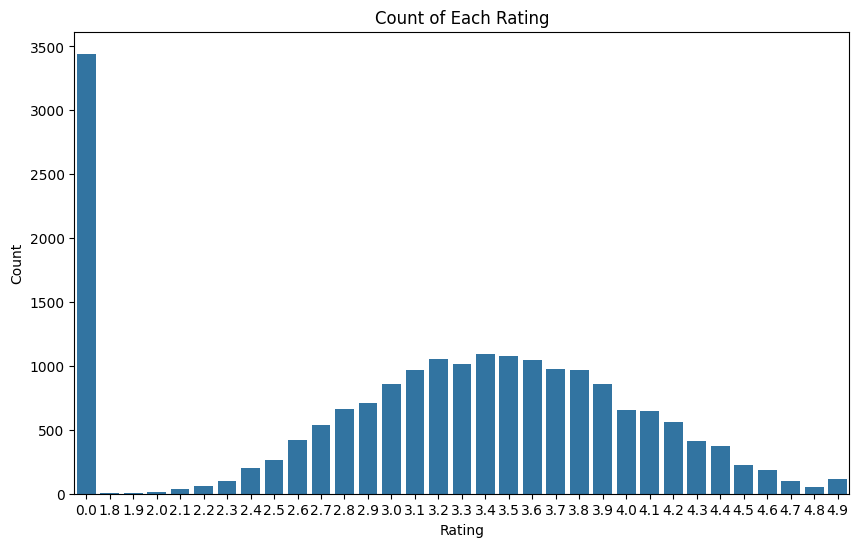

In [ ]:
# Plot a bar plot of the ratings
plt.figure(figsize=(10, 6))
sns.countplot(x=ratings_column, data=data)
plt.title('Count of Each Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

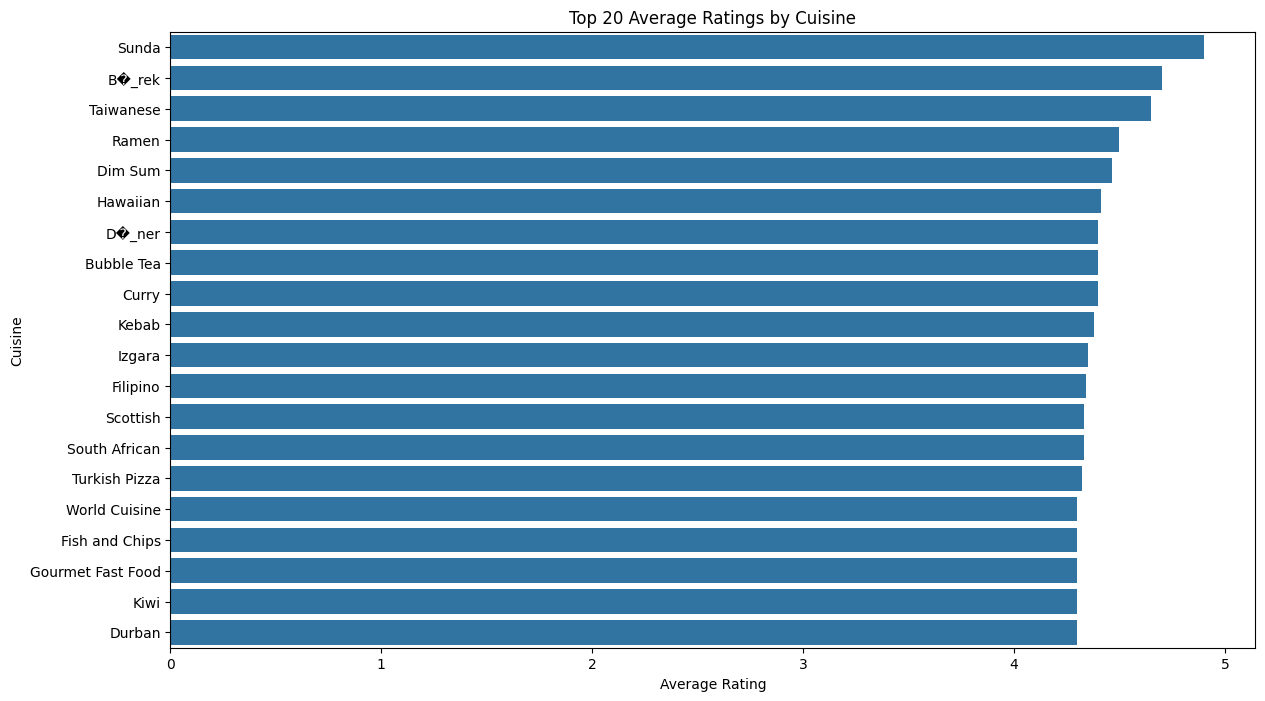

In [ ]:
# Columns for cuisine and ratings
cuisine_column = 'Cuisines'
ratings_column = 'Aggregate rating'

# Group by cuisine and calculate the average rating
avg_ratings_cuisine = data.groupby(cuisine_column)[ratings_column].mean().reset_index()

# Sort the cuisines by average rating
avg_ratings_cuisine = avg_ratings_cuisine.sort_values(by=ratings_column, ascending=False)

# Display top N cuisines
top_n = 20
avg_ratings_cuisine_top = avg_ratings_cuisine.head(top_n)

# Plot the average ratings by cuisine (horizontal bar plot)
plt.figure(figsize=(14, 8))
sns.barplot(x=ratings_column, y=cuisine_column, data=avg_ratings_cuisine_top)
plt.title(f'Top {top_n} Average Ratings by Cuisine')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()

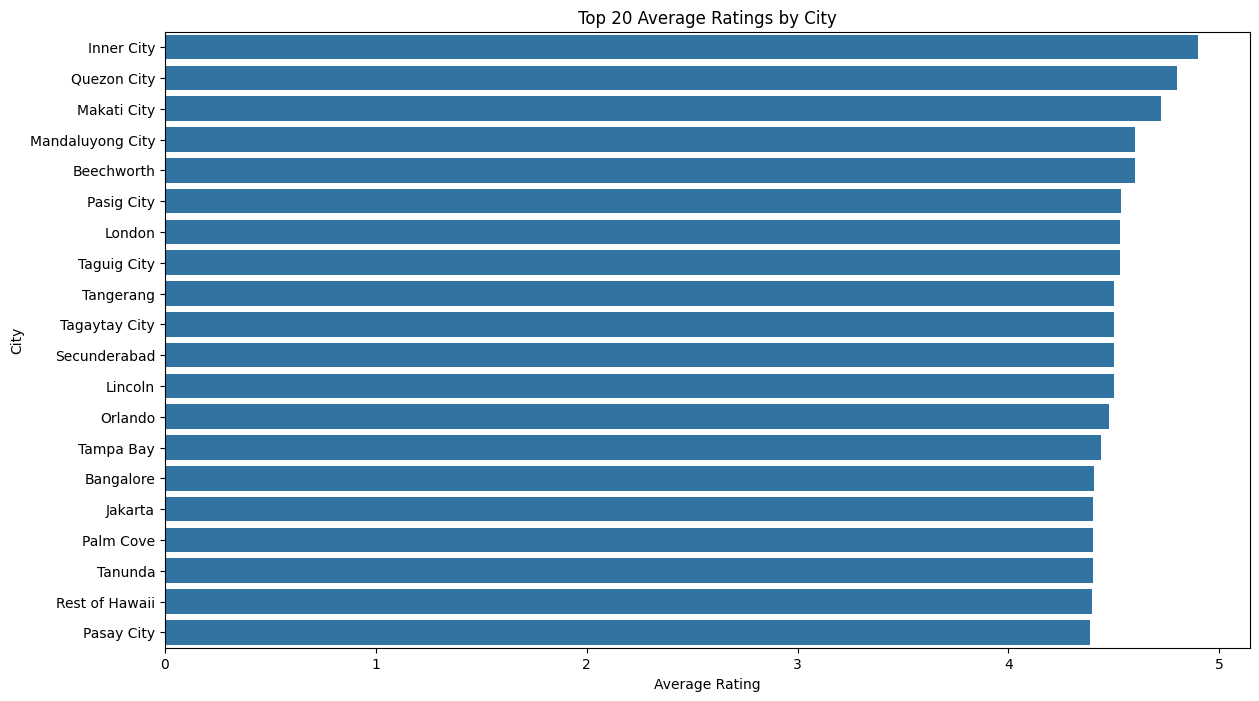

In [ ]:
# Columns for city and ratings
city_column = 'City'
ratings_column = 'Aggregate rating'

# Group by city and calculate the average rating
avg_ratings_city = data.groupby(city_column)[ratings_column].mean().reset_index()

# Sort the cities by average rating
avg_ratings_city = avg_ratings_city.sort_values(by=ratings_column, ascending=False)

# Display top N cities
top_n = 20
avg_ratings_city_top = avg_ratings_city.head(top_n)

# Plot the average ratings by city (horizontal bar plot)
plt.figure(figsize=(14, 8))
sns.barplot(x=ratings_column, y=city_column, data=avg_ratings_city_top)
plt.title(f'Top {top_n} Average Ratings by City')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

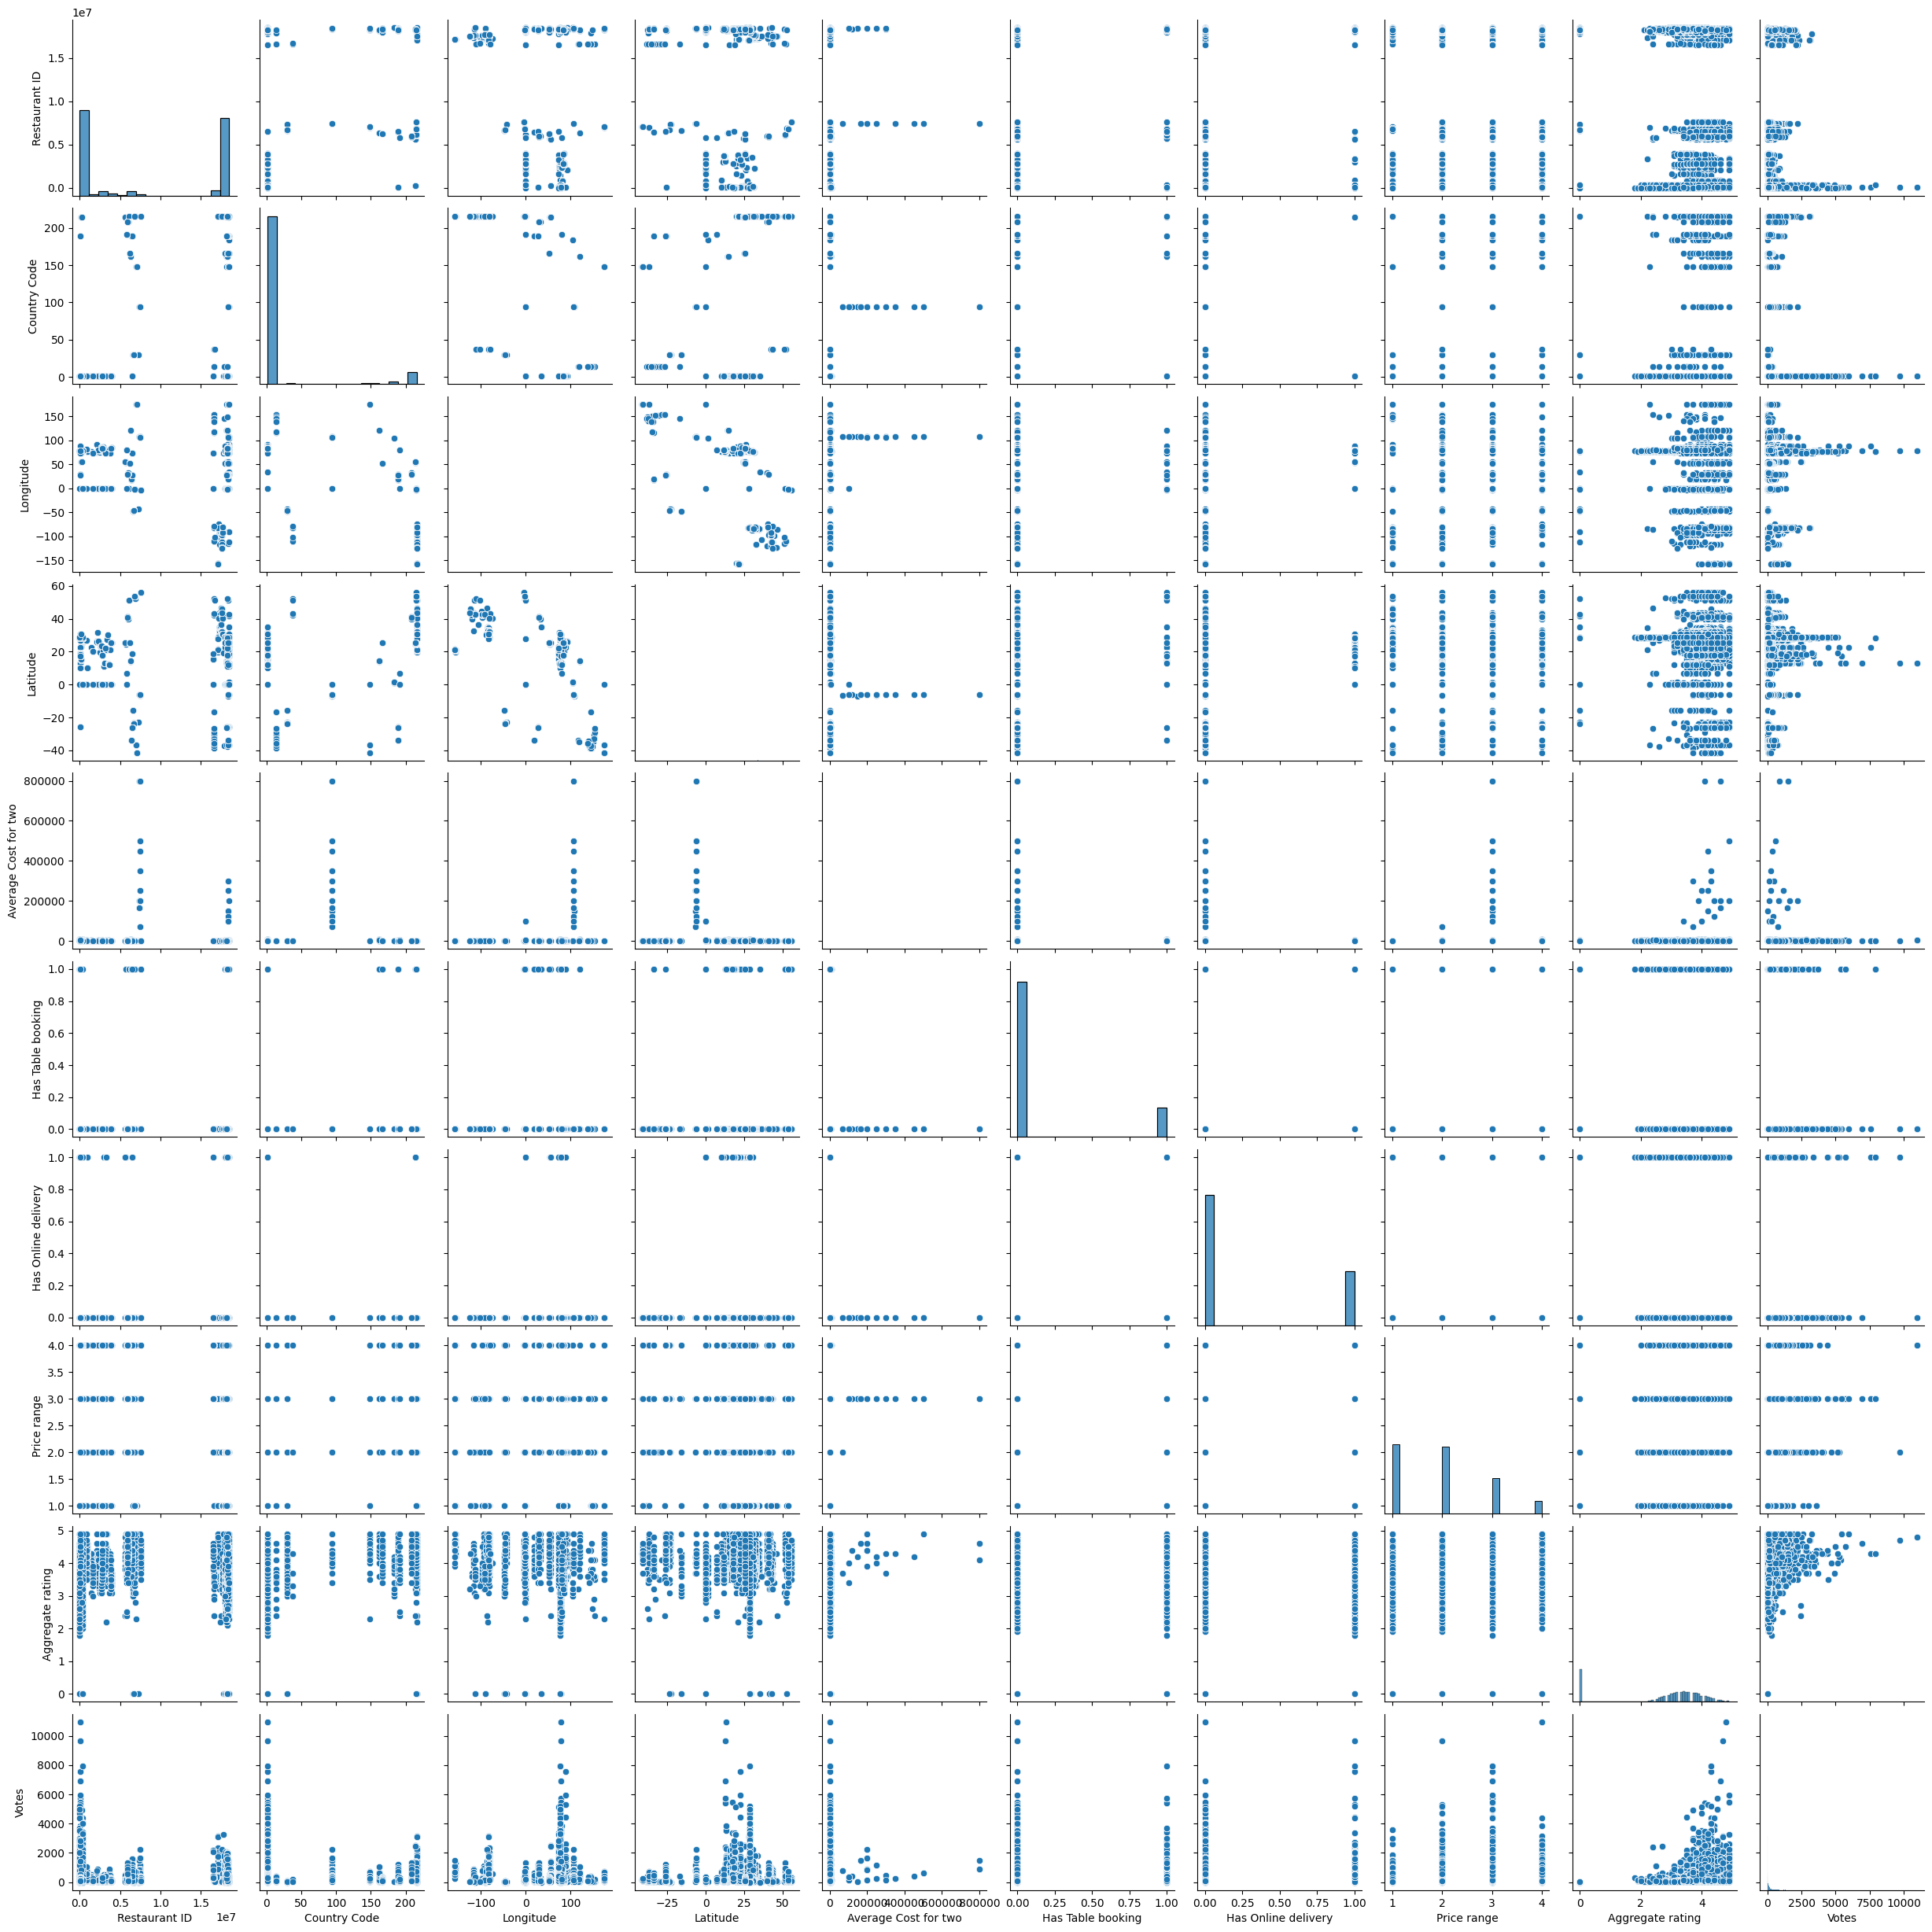

In [ ]:
sns.pairplot(data)
plt.show()

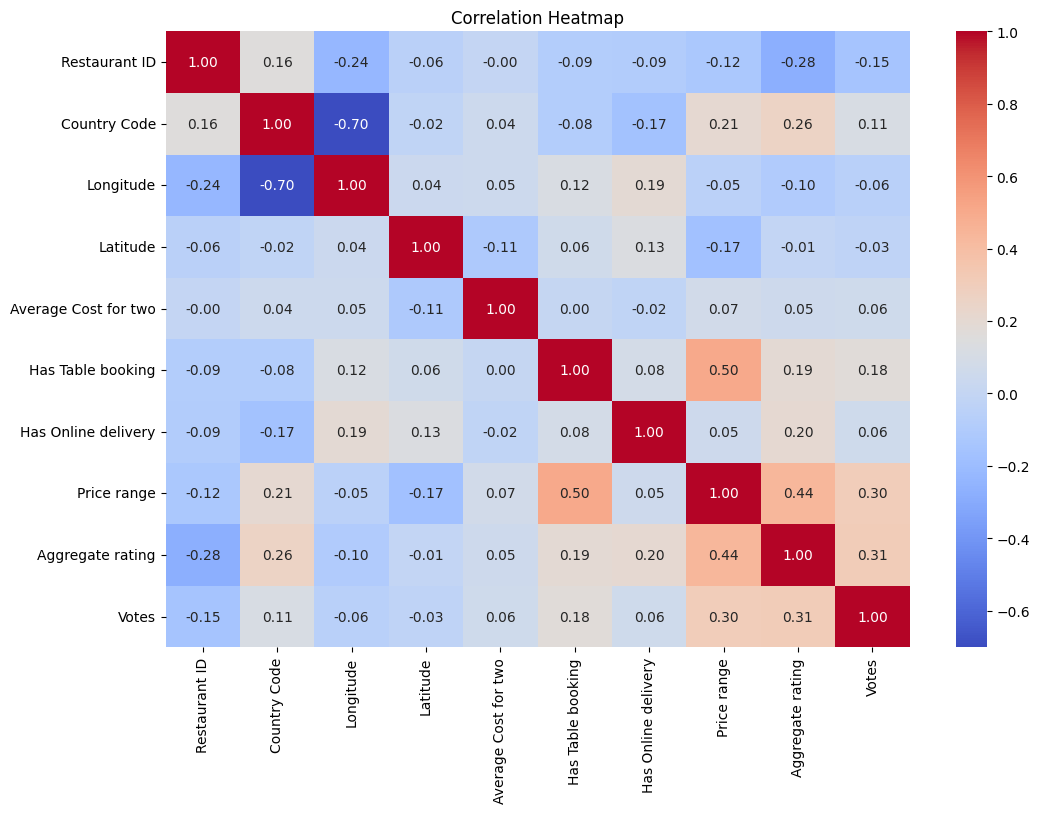

In [ ]:
import numpy as np
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_data.corr()  # Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()